In [3]:
import os
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [4]:
dataset_1 = os.path.join("../../datasets", 
    "Brain MRI Dataset of Multiple Sclerosis with Consensus Manual Lesion "\
    "Segmentation and Patient Meta Information")

patient_1 = os.path.join(dataset_1, "Patient-1")

patient_1_images = os.listdir(patient_1)
patient_1_images

['1-LesionSeg-T2.nii',
 '1-T1.nii',
 '1-LesionSeg-T1.nii',
 '1-Flair.nii',
 '1-T2.nii',
 '1-LesionSeg-Flair.nii']

In [5]:
def load_nii_image(file_path):
    img = nib.load(file_path)
    return img.get_fdata()

In [6]:
def get_middle_slice(img_data):
    return img_data[:, :, img_data.shape[2] // 2]

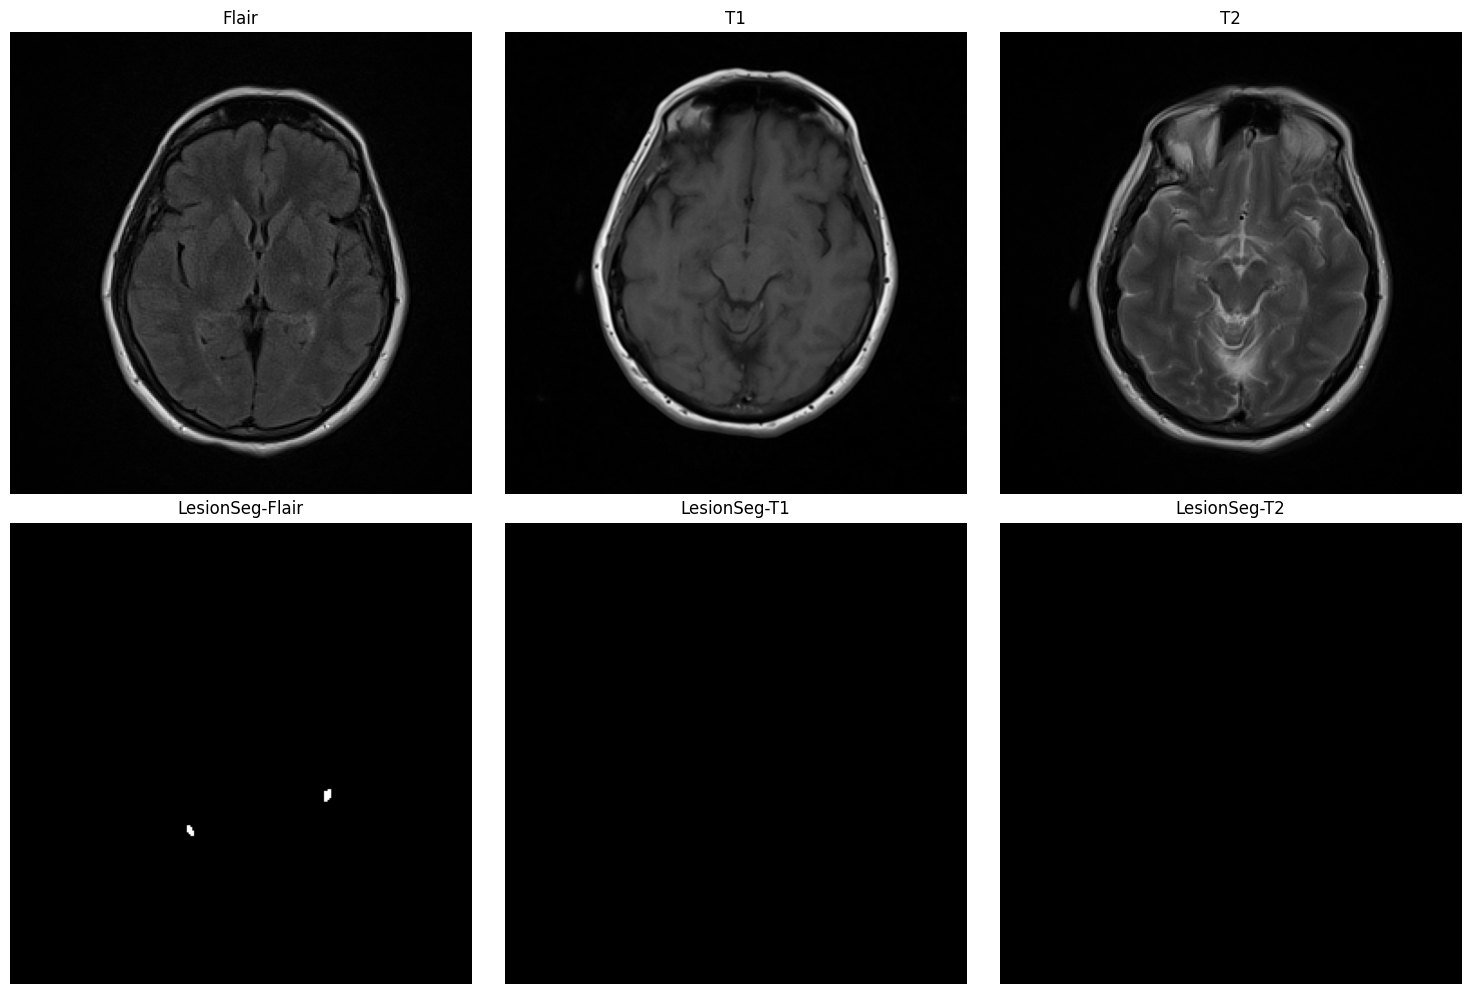

In [10]:
# File paths for images and corresponding segmentation
flair_image_path = os.path.join(patient_1, "1-Flair.nii")
t1_image_path = os.path.join(patient_1, "1-T1.nii")
t2_image_path = os.path.join(patient_1, "1-T2.nii")

seg_flair_path = os.path.join(patient_1, "1-LesionSeg-Flair.nii")
seg_t1_path = os.path.join(patient_1, "1-LesionSeg-T1.nii")
seg_t2_path = os.path.join(patient_1, "1-LesionSeg-T2.nii")

# Load images and segmentations
flair_img = load_nii_image(flair_image_path)
t1_img = load_nii_image(t1_image_path)
t2_img = load_nii_image(t2_image_path)

seg_flair_img = load_nii_image(seg_flair_path)
seg_t1_img = load_nii_image(seg_t1_path)
seg_t2_img = load_nii_image(seg_t2_path)

# Get the middle slices
flair_slice = get_middle_slice(flair_img)
t1_slice = get_middle_slice(t1_img)
t2_slice = get_middle_slice(t2_img)

seg_flair_slice = get_middle_slice(seg_flair_img)
seg_t1_slice = get_middle_slice(seg_t1_img)
seg_t2_slice = get_middle_slice(seg_t2_img)

# Plot the images and their segmentations
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Row 1: Original images (Flair, T1, T2)
axes[0, 0].imshow(flair_slice, cmap='gray')
axes[0, 0].set_title('Flair')
axes[0, 0].axis('off')

axes[0, 1].imshow(t1_slice, cmap='gray')
axes[0, 1].set_title('T1')
axes[0, 1].axis('off')

axes[0, 2].imshow(t2_slice, cmap='gray')
axes[0, 2].set_title('T2')
axes[0, 2].axis('off')

# Row 2: Lesion segmentation images (SegmentationFlair, SegmentationT1, SegmentationT2)
axes[1, 0].imshow(seg_flair_slice, cmap='gray')
axes[1, 0].set_title('LesionSeg-Flair')
axes[1, 0].axis('off')

axes[1, 1].imshow(seg_t1_slice, cmap='gray')
axes[1, 1].set_title('LesionSeg-T1')
axes[1, 1].axis('off')

axes[1, 2].imshow(seg_t2_slice, cmap='gray')
axes[1, 2].set_title('LesionSeg-T2')
axes[1, 2].axis('off')

plt.tight_layout()
plt.savefig("patient_1_plot.jpg")
plt.show()


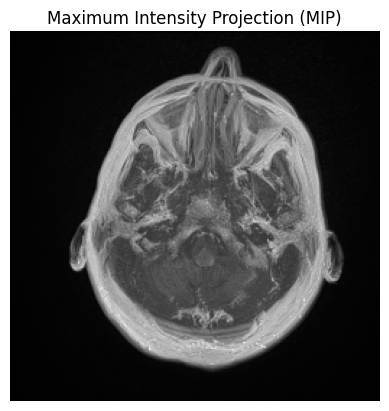

In [33]:

def show_max_intensity_projection(nii_file, output_image=None):
    """
    Show and optionally save the maximum intensity projection (MIP) of a 3D NIfTI image.
    
    :param nii_file: Path to the NIfTI file.
    :param output_image: Path to save the MIP image as PNG (optional).
    """
    # Load the NIfTI image
    img = nib.load(nii_file)
    img_data = img.get_fdata()

    # Perform the maximum intensity projection along the Z-axis (third dimension)
    mip_image = np.max(img_data, axis=2)

    # Normalize the MIP image to the range [0, 255] for saving/viewing as an image
    mip_normalized = (mip_image - np.min(mip_image)) / (np.max(mip_image) - np.min(mip_image))
    mip_normalized = (mip_normalized * 255).astype(np.uint8)

    # Show the MIP using matplotlib
    plt.imshow(mip_normalized, cmap='gray')
    plt.title("Maximum Intensity Projection (MIP)")
    plt.axis('off')
    plt.show()

    # Optionally save the MIP image as a PNG
    if output_image:
        img_pil = Image.fromarray(mip_normalized)
        img_pil.save(output_image)
        print(f"Saved MIP image as {output_image}")

show_max_intensity_projection(flair_image_path, None)


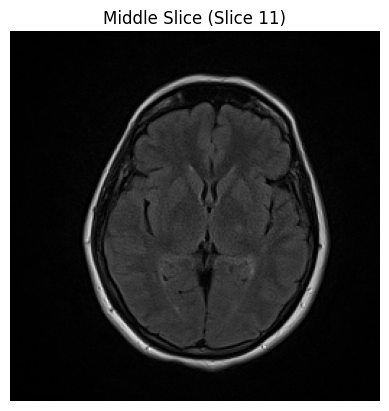

In [42]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def show_middle_slice(nii_file, output_image=None):
    """
    Show and optionally save the middle slice of a 3D NIfTI image.
    
    :param nii_file: Path to the NIfTI file.
    :param output_image: Path to save the middle slice as PNG (optional).
    """
    # Load the NIfTI file
    img = nib.load(nii_file)
    img_data = img.get_fdata()

    # Select the middle slice along the Z-axis (third dimension)
    middle_slice_idx = img_data.shape[2] // 2
    middle_slice = img_data[:, :, middle_slice_idx]

    # Normalize the middle slice to range [0, 255] for saving/viewing as an image
    normalized_slice = (middle_slice - np.min(middle_slice)) / (np.max(middle_slice) - np.min(middle_slice))
    normalized_slice = (normalized_slice * 255).astype(np.uint8)

    # Show the middle slice using matplotlib
    plt.imshow(normalized_slice, cmap='gray')
    plt.title(f"Middle Slice (Slice {middle_slice_idx})")
    plt.axis('off')
    plt.show()

    # Optionally save the middle slice as a PNG
    if output_image:
        img_pil = Image.fromarray(normalized_slice)
        img_pil.save(output_image)
        print(f"Saved middle slice as {output_image}")
        
show_middle_slice(flair_image_path, None)
